# Objective
The goal of the data analysis project using sql would be to identify opportunities to increase the occupancy rate on low performing flights, which can ultimately lead to the increased profit to the airline.

# Importing libraries

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Database Connection

In [2]:
connection=sqlite3.connect('travel.sqlite')
cursor=connection.cursor()

In [3]:
# Printing all tables in database
tables_in_database=cursor.execute("Select name from sqlite_master where type='table'")
print("Tables in database are")
list_of_tables=[table[0] for table in cursor.fetchall()]  # we write 0 index because we want just first value of tuple
for each in list_of_tables:
    print(each)

# The names are both in english and russian langauge

Tables in database are
aircrafts_data
airports_data
boarding_passes
bookings
flights
seats
ticket_flights
tickets


# Data Exploration
pd.read_sql_query is recommended by mam ayushi as it will return results in form of databases not just names that are done by cursor.execute()

In [4]:
aircrafts_data=pd.read_sql_query("""Select * from aircrafts_data""",connection)
aircrafts_data
# this data is of 2017 of a russian airline 

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


In [5]:
airports_data=pd.read_sql_query("""Select * from airports_data""",connection)
airports_data

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,"{""en"": ""Murmansk Airport"", ""ru"": ""Мурманск""}","{""en"": ""Murmansk"", ""ru"": ""Мурманск""}","(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,"{""en"": ""Abakan Airport"", ""ru"": ""Абакан""}","{""en"": ""Abakan"", ""ru"": ""Абакан""}","(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,"{""en"": ""Barnaul Airport"", ""ru"": ""Барнаул""}","{""en"": ""Barnaul"", ""ru"": ""Барнаул""}","(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,"{""en"": ""Anapa Vityazevo Airport"", ""ru"": ""Витяз...","{""en"": ""Anapa"", ""ru"": ""Анапа""}","(37.3473014831539984,45.002101898192997)",Europe/Moscow


In [6]:
boarding_passes=pd.read_sql_query("""Select * from boarding_passes""",connection)
boarding_passes

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A
...,...,...,...,...
579681,0005434302871,19945,85,20F
579682,0005432892791,19945,86,21C
579683,0005434302869,19945,87,20E
579684,0005432802476,19945,88,21F


In [7]:
tickets=pd.read_sql_query("""Select * from tickets""",connection)
tickets

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589
...,...,...,...
366728,0005435999869,D730BA,0474 690760
366729,0005435999870,D730BA,6535 751108
366730,0005435999871,A1AD46,1596 156448
366731,0005435999872,7B6A53,9374 822707


In [8]:
ticket_flights=pd.read_sql_query("""Select * from ticket_flights""",connection)
ticket_flights

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100
...,...,...,...,...
1045721,0005435097522,32094,Economy,5200
1045722,0005435097521,32094,Economy,5200
1045723,0005435104384,32094,Economy,5200
1045724,0005435104352,32094,Economy,5200


In [9]:
seats=pd.read_sql_query("""Select * from seats""",connection)
seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [10]:
flights=pd.read_sql_query("""Select * from flights""",connection)
flights.shape

(33121, 10)

In [11]:
bookings=pd.read_sql_query("""Select * from bookings""",connection)
bookings

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600
...,...,...,...
262783,FFFEF3,2017-07-17 07:23:00+03,56000
262784,FFFF2C,2017-08-08 05:55:00+03,10800
262785,FFFF43,2017-07-20 20:42:00+03,78500
262786,FFFFA8,2017-08-08 04:45:00+03,28800


In [12]:
# checking datatype of columns in each table.
for table in list_of_tables:
    print(table)
    column_info=connection.execute("PRAGMA table_info({})".format(table))
    for column in column_info.fetchall():
        print(column[1:3])  # only want first 3
    print("*"*30)

aircrafts_data
('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'INTEGER')
******************************
airports_data
('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'TEXT')
******************************
boarding_passes
('ticket_no', 'character(13)')
('flight_id', 'INTEGER')
('boarding_no', 'INTEGER')
('seat_no', 'character varying(4)')
******************************
bookings
('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')
******************************
flights
('flight_id', 'INTEGER')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departure_airport', 'character(3)')
('arrival_airport', 'character(3)')
('status', 'character varying(20)')
('aircraft_code', 'character(3)')
('actual_departure', 'timestamp with time zone')
('actual_arrival', 'timestamp with time zon

# Missing Values

In [13]:
# checking for missing values
for table in list_of_tables:
    print(f"\ntable:{table}")
    df_table=pd.read_sql_query(f"Select * from {table}",connection)
    print(df_table.isnull().sum())


table:aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

table:airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

table:boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

table:bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

table:flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

table:seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

table:ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

table:tickets
ticket_no       0
book_ref        0
passenger_id    0
dtype: int64


In [14]:
# In flights table \N values are actually null values so we will fill them with 'Not mentioned'
flights.loc[flights['actual_arrival']=='\\N','actual_arrival']='Not mentioned'
flights.loc[flights['actual_departure']=='\\N','actual_departure']='Not mentioned'

# Checking for futher such missing and misformated values
for each in flights.columns:
    print(each)
    print(flights[each].unique())
    print("\n")

flight_id
[ 1185  3979  4739 ... 33119 33120 33121]


flight_no
['PG0134' 'PG0052' 'PG0561' 'PG0529' 'PG0461' 'PG0667' 'PG0360' 'PG0569'
 'PG0498' 'PG0621' 'PG0612' 'PG0676' 'PG0010' 'PG0059' 'PG0035' 'PG0648'
 'PG0388' 'PG0098' 'PG0076' 'PG0632' 'PG0556' 'PG0467' 'PG0483' 'PG0334'
 'PG0065' 'PG0674' 'PG0405' 'PG0404' 'PG0402' 'PG0403' 'PG0222' 'PG0202'
 'PG0273' 'PG0216' 'PG0213' 'PG0212' 'PG0416' 'PG0055' 'PG0054' 'PG0045'
 'PG0341' 'PG0368' 'PG0335' 'PG0517' 'PG0136' 'PG0005' 'PG0168' 'PG0144'
 'PG0519' 'PG0164' 'PG0509' 'PG0709' 'PG0210' 'PG0124' 'PG0629' 'PG0112'
 'PG0095' 'PG0315' 'PG0239' 'PG0541' 'PG0542' 'PG0639' 'PG0289' 'PG0019'
 'PG0249' 'PG0075' 'PG0220' 'PG0645' 'PG0072' 'PG0605' 'PG0208' 'PG0657'
 'PG0142' 'PG0482' 'PG0607' 'PG0029' 'PG0030' 'PG0085' 'PG0593' 'PG0196'
 'PG0454' 'PG0383' 'PG0382' 'PG0384' 'PG0118' 'PG0337' 'PG0370' 'PG0229'
 'PG0227' 'PG0228' 'PG0671' 'PG0412' 'PG0396' 'PG0414' 'PG0050' 'PG0007'
 'PG0008' 'PG0025' 'PG0269' 'PG0450' 'PG0126' 'PG0099' 'PG04

# Basic Analysis
### How many planes have more than 100 seats?

In [15]:
pd.read_sql_query("Select aircraft_code,count(*) as num_seats from seats group by aircraft_code having num_seats >100 order by num_seats Desc",connection)

,aircraft_code,num_seats
0,773,402
1,763,222
2,321,170
3,320,140
4,733,130
5,319,116


### How the number of tickets booked and total amount earned changed with time.

In [16]:
# we have to inner join bookings and tickets table
tickets=pd.read_sql_query("""Select * from tickets inner join bookings
                  on tickets.book_ref=bookings.book_ref""",connection)

# converting book_date in datetime so that we can show it on line chart
tickets['book_date']=pd.to_datetime(tickets['book_date']) 

In [17]:
tickets['book_date']

0        2017-07-05 20:19:00+03:00
1        2017-07-05 20:19:00+03:00
2        2017-06-29 01:55:00+03:00
3        2017-06-29 01:55:00+03:00
4        2017-07-03 04:37:00+03:00
                    ...           
366728   2017-08-14 11:50:00+03:00
366729   2017-08-14 11:50:00+03:00
366730   2017-08-13 03:49:00+03:00
366731   2017-08-15 15:54:00+03:00
366732   2017-08-15 15:54:00+03:00
Name: book_date, Length: 366733, dtype: datetime64[ns, UTC+03:00]

In [18]:
# taking only date from book_date by removing time
tickets['date']=tickets['book_date'].dt.date
x=tickets.groupby('date')['date'].count()
x.name='total_booking'
x

date
2017-06-21       6
2017-06-22      12
2017-06-23      28
2017-06-24     106
2017-06-25     266
2017-06-26     499
2017-06-27    1028
2017-06-28    1678
2017-06-29    2765
2017-06-30    3772
2017-07-01    4936
2017-07-02    5780
2017-07-03    6686
2017-07-04    7112
2017-07-05    7484
2017-07-06    7656
2017-07-07    7722
2017-07-08    7586
2017-07-09    7860
2017-07-10    7749
2017-07-11    7852
2017-07-12    7691
2017-07-13    7641
2017-07-14    7932
2017-07-15    7668
2017-07-16    7896
2017-07-17    7546
2017-07-18    7745
2017-07-19    7821
2017-07-20    7637
2017-07-21    7771
2017-07-22    7698
2017-07-23    7627
2017-07-24    7667
2017-07-25    7826
2017-07-26    7730
2017-07-27    7636
2017-07-28    7827
2017-07-29    7588
2017-07-30    7732
2017-07-31    7653
2017-08-01    7740
2017-08-02    7669
2017-08-03    7756
2017-08-04    7908
2017-08-05    8064
2017-08-06    8016
2017-08-07    7910
2017-08-08    8153
2017-08-09    8258
2017-08-10    8493
2017-08-11    8737
2017-08

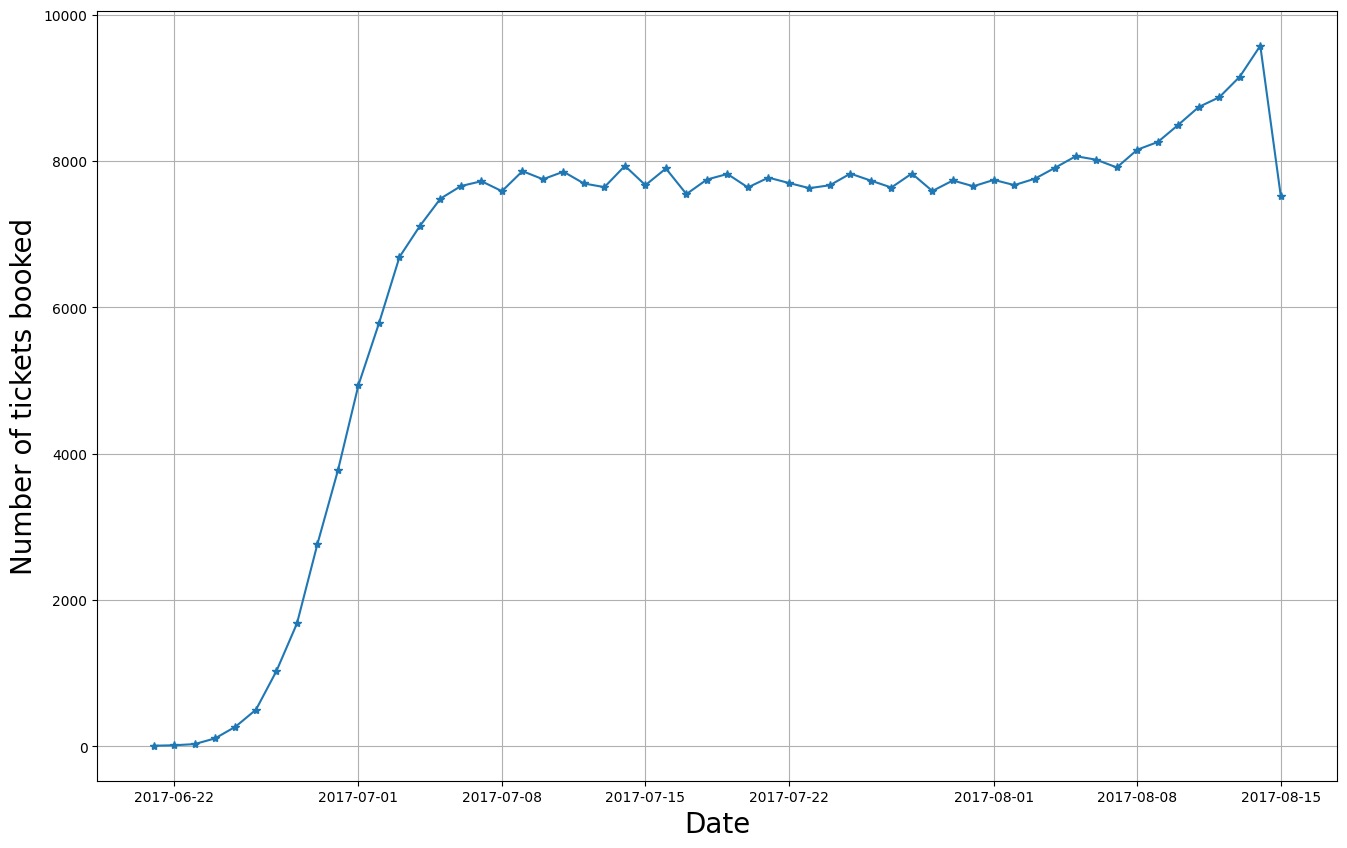

In [19]:
# Visualzing the change in tickets booked with respect to time
plt.figure(figsize=(16,10))
plt.plot(x.index,x.values,marker='*')
plt.xlabel("Date",fontsize=20)
plt.ylabel("Number of tickets booked",fontsize=20)
plt.grid("b")
plt.show()

### Now we will plt for total amount
### How the number of tickets booked and total amount earned changed with time.

In [20]:
bookings=pd.read_sql_query('Select * from bookings',connection)
bookings['book_date']=pd.to_datetime(bookings['book_date'])
bookings['date'] = tickets['book_date'].dt.date
x=bookings.groupby("date")['total_amount'].sum().reset_index()


In [21]:
x

,date,total_amount
0,2017-06-21,491600
1,2017-06-22,248200
2,2017-06-23,1806500
3,2017-06-24,6702300
4,2017-06-25,13419700
5,2017-06-26,28237400
6,2017-06-27,63866300
7,2017-06-28,104985000
8,2017-06-29,164026300
9,2017-06-30,222360600


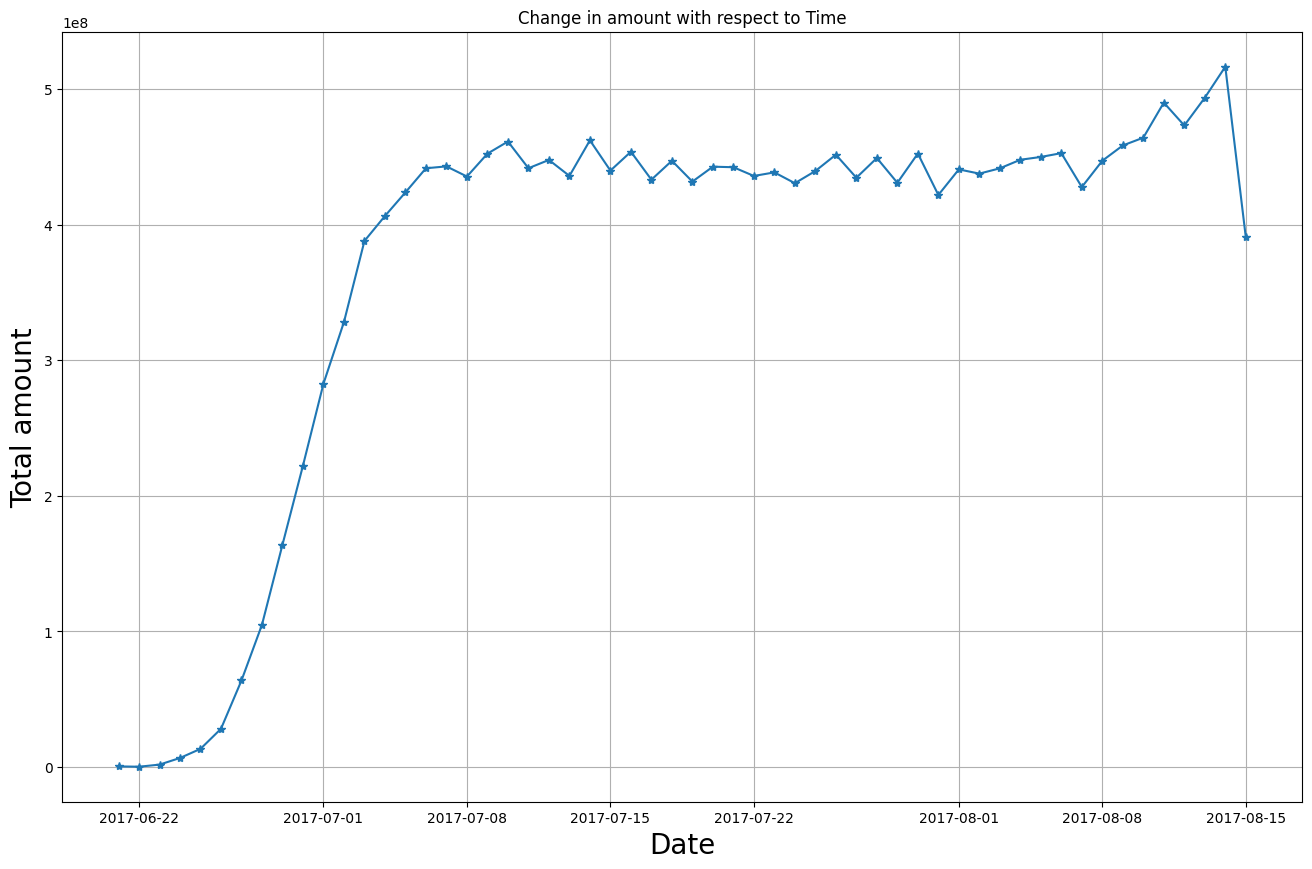

In [22]:
# Visualzing the change amount earned by airline with respect to time
plt.figure(figsize=(16,10))
plt.plot(x['date'],x['total_amount'],marker='*')
plt.title("Change in amount with respect to Time")
plt.xlabel("Date",fontsize=20)
plt.ylabel("Total amount",fontsize=20)
plt.grid("b")

# both graphs are same that proves the only source of income for airline is its tickets

### Calculate the average charges for each aircraft with different fare conditions

In [23]:
df=pd.read_sql_query("""Select fare_conditions,aircraft_code, avg(amount) from ticket_flights join flights
                    on ticket_flights.flight_id = flights.flight_id
                    group by aircraft_code, fare_conditions""",connection)
df

,fare_conditions,aircraft_code,avg(amount)
0,Business,319,113550.557703
1,Economy,319,38311.402347
2,Business,321,34435.662664
3,Economy,321,11534.974764
4,Business,733,41865.626175
5,Economy,733,13985.152000
6,Business,763,82839.842866
7,Economy,763,27594.721829
8,Business,773,57779.909435
9,Comfort,773,32740.552889


<Axes: xlabel='aircraft_code', ylabel='avg(amount)'>

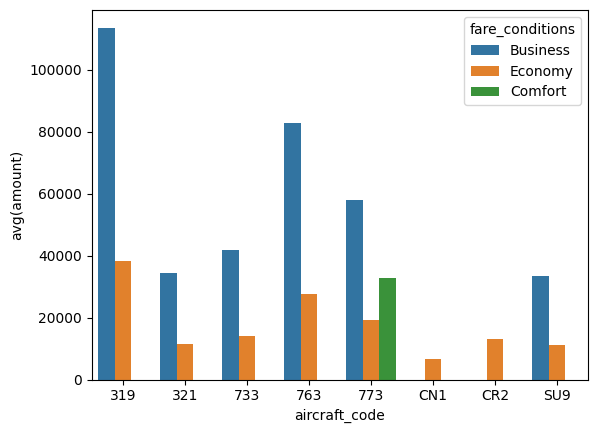

In [24]:
import seaborn as sns
sns.barplot(data=df, x='aircraft_code',y='avg(amount)',hue='fare_conditions')

# Analyzing occupancy rate

### For each aircraft, calculates the total revenue per year and the average revenue per tickets

In [25]:
# Using concept of subquery
pd.read_sql_query("""Select aircraft_code, ticket_count, total_revenue,total_revenue/ticket_count as average_revenue_per_ticekt from
                  (Select aircraft_code, count(*) as ticket_count, sum(amount) as total_revenue 
                  from ticket_flights
                  join
                  flights on 
                  ticket_flights.flight_id=flights.flight_id
                  group by aircraft_code)""",connection)

,aircraft_code,ticket_count,total_revenue,average_revenue_per_ticekt
0,319,52853,2706163100,51201
1,321,107129,1638164100,15291
2,733,86102,1426552100,16568
3,763,124774,4371277100,35033
4,773,144376,3431205500,23765
5,CN1,14672,96373800,6568
6,CR2,150122,1982760500,13207
7,SU9,365698,5114484700,13985


### Calculate teh average occupancy per aircraft

In [26]:
occupancy_rate=pd.read_sql_query("""select a.aircraft_code, avg(a.seats_count) as booked_seats, b.num_seats, avg(a.seats_count)/b.num_seats as occupancy_rate
from
(
select aircraft_code, flights.flight_id, count(*) as seats_count from boarding_passes
inner join flights
on boarding_passes.flight_id=flights.flight_id
group by aircraft_code, flights.flight_id
) as a
inner join
(select aircraft_code, count(*) as num_seats from seats group by aircraft_code) as b
on a.aircraft_code=b.aircraft_code group by  a.aircraft_code""", connection)

### Calculate by how much teh total annual turnover could increase by giving all aircraft a 10% higher accupancy rate.

In [27]:
occupancy_rate['Inc occupancy rate'] = occupancy_rate['occupancy_rate']+occupancy_rate['occupancy_rate']*0.1
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,Inc occupancy rate
0,319,53.583181,116,0.461924,0.508116
1,321,88.809231,170,0.522407,0.574648
2,733,80.255462,130,0.617350,0.679085
3,763,113.937294,222,0.513231,0.564554
4,773,264.925806,402,0.659019,0.724921
5,CN1,6.004431,12,0.500369,0.550406
6,CR2,21.482847,50,0.429657,0.472623
7,SU9,56.812113,97,0.585692,0.644261


In [28]:
total_revenue = pd.read_sql_query("""select aircraft_code, sum(amount) as total_revenue from ticket_flights 
inner join flights on ticket_flights.flight_id = flights.flight_id group by aircraft_code""", connection)
occupancy_rate['Inc Total Annual Turnover']=(total_revenue['total_revenue']/occupancy_rate['occupancy_rate'])/occupancy_rate['Inc occupancy rate']


In [29]:
# to see exact values in turnover column
pd.set_option('display.float_format',str)

In [30]:
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,Inc occupancy rate,Inc Total Annual Turnover
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726,11529760258.742641
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905,5456904395.5939
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565,3402768913.332769
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146,15086545329.203543
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492,7182202079.357982
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727,349933103.0515281
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382,9764138139.648129
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144,13554103190.2697
